Análise Exploratória - Quantidade

Importação das bibliotecas necessárias

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima


In [59]:
df = pd.read_csv("../data/quantidade.csv")

In [60]:
df.head()

,data,queijo,leite,doce_leite,ovos,suinos,hortalicas
0,ago-2021,0,36,0,0,2,0
1,set-2021,61,138,18,0,4,0
2,out-2021,74,122,28,0,3,0
3,nov-2021,66,213,3,0,4,0
4,dez-2021,41,84,5,0,4,0


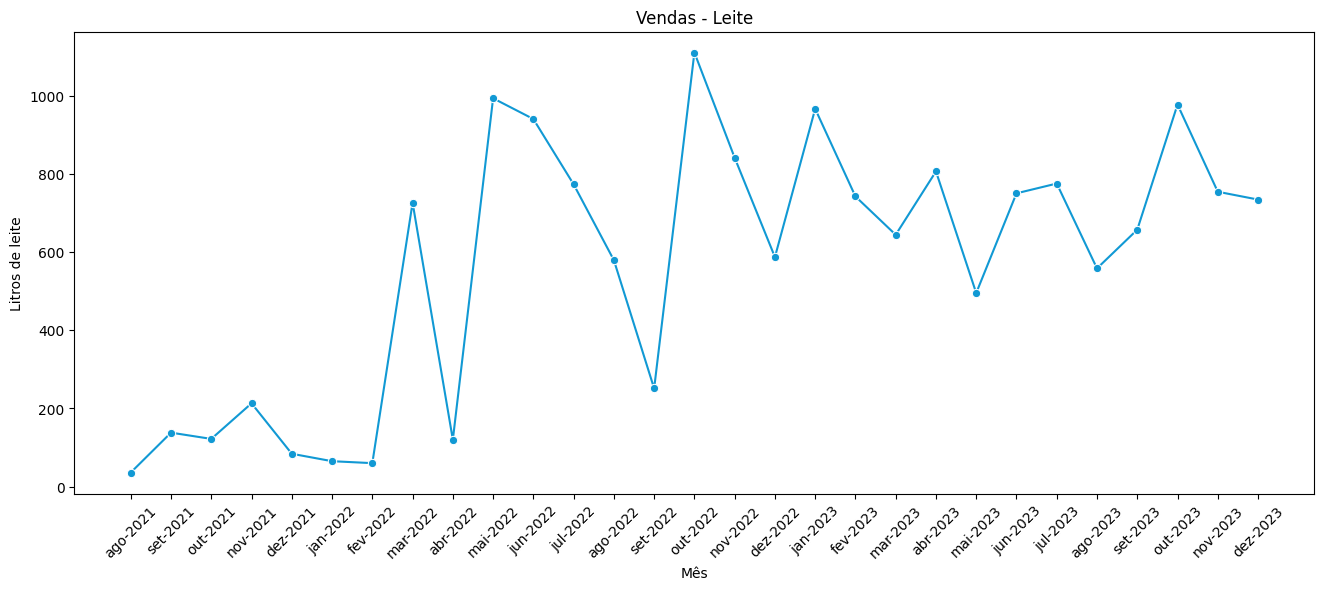

In [61]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='leite', marker='o', color= '#1199d4')
plt.xticks(rotation=45)
plt.title('Vendas - Leite')
plt.xlabel('Mês')
plt.ylabel('Litros de leite')
plt.show()

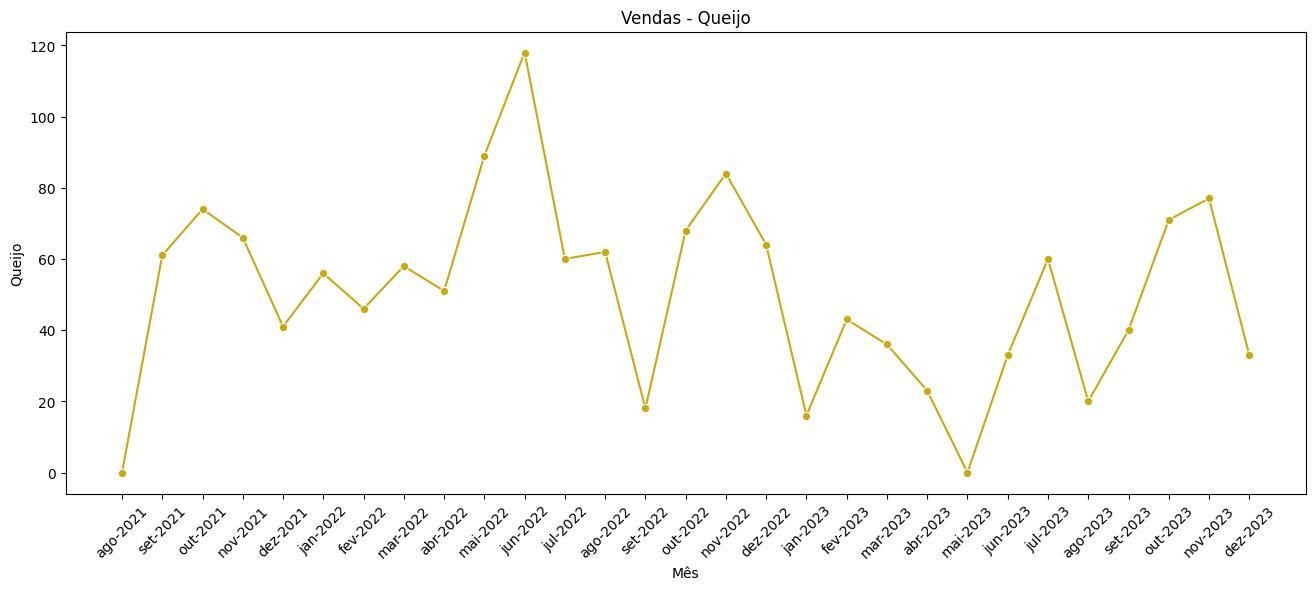

In [62]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='queijo', marker='o', color='#c9aa0c')
plt.title('Vendas - Queijo')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Queijo')
plt.show()

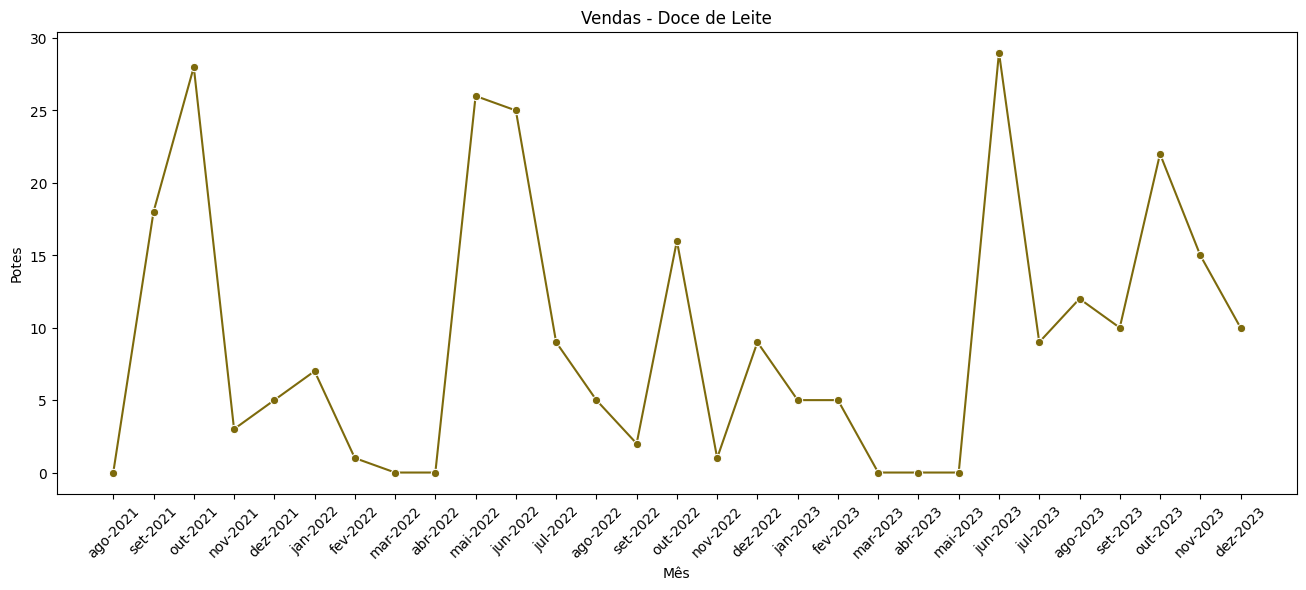

In [63]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='data', y='doce_leite', marker='o', color='#7d6a0c')
plt.title('Vendas - Doce de Leite')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Potes')
plt.show()

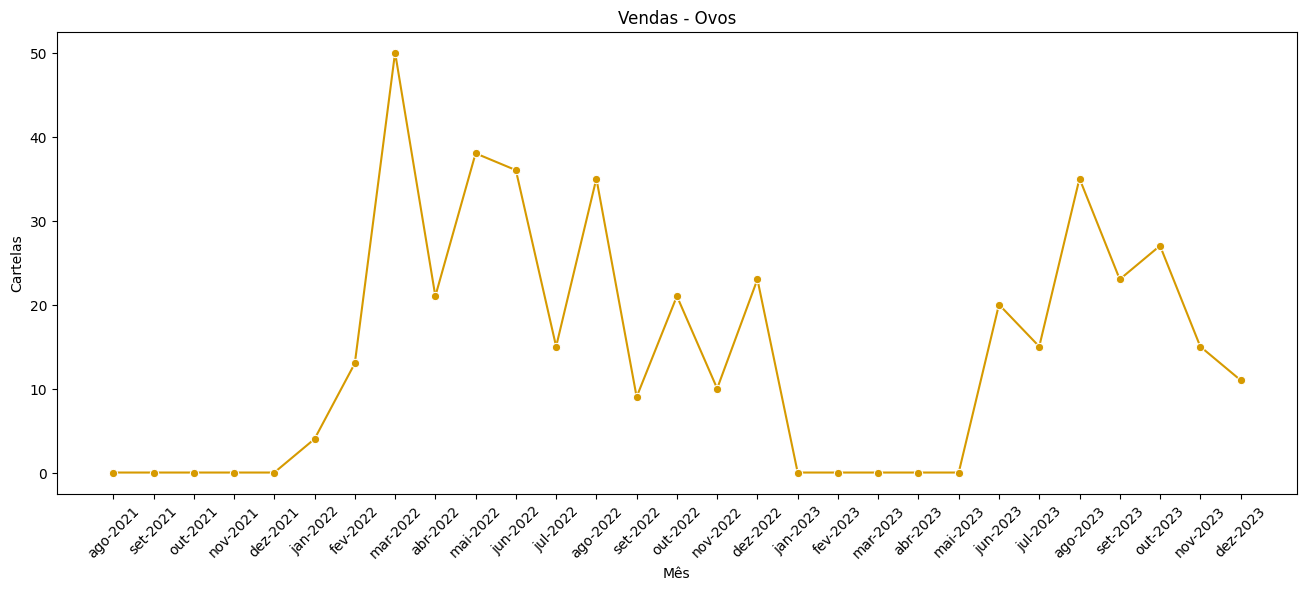

In [64]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='ovos', marker='o', color='#d69a00')
plt.title('Vendas - Ovos')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Cartelas')
plt.show()

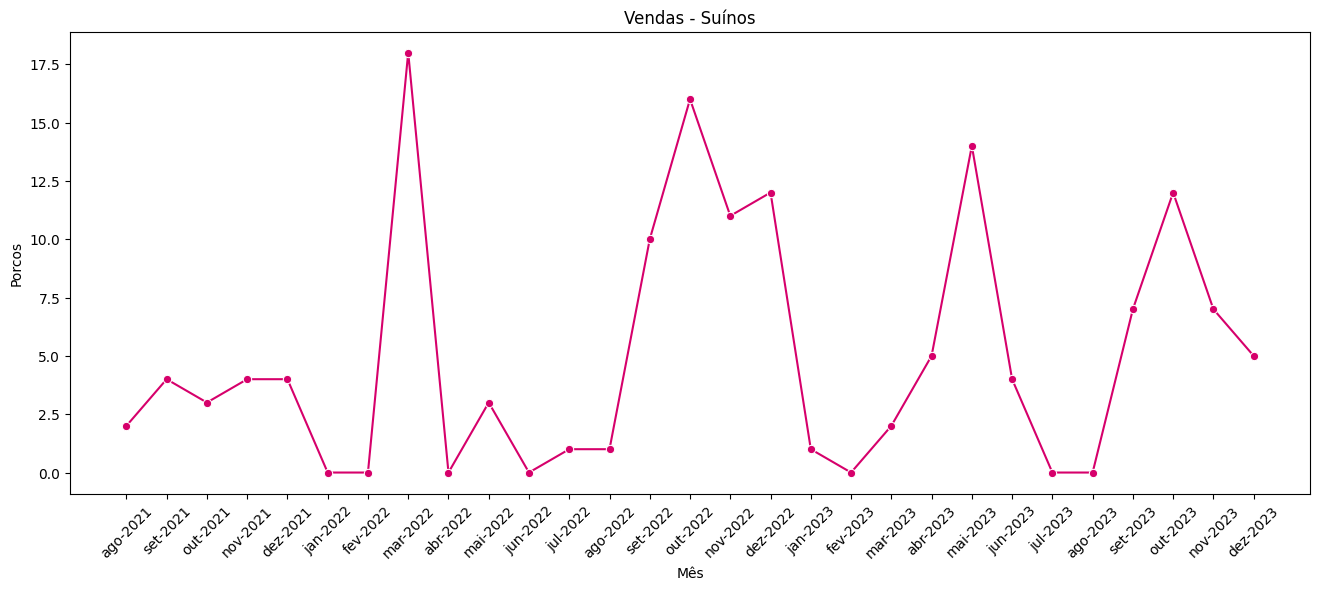

In [65]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='suinos', marker='o', color='#d6006b')
plt.title('Vendas - Suínos')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Porcos')
plt.show()

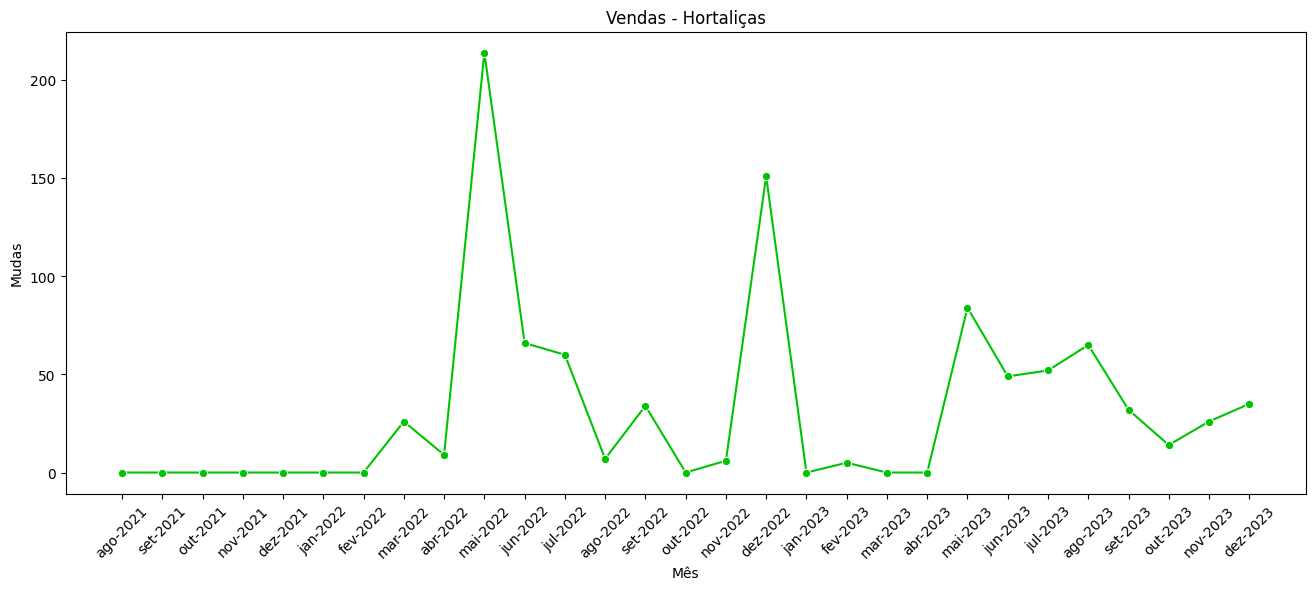

In [66]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='hortalicas', marker='o', color='#00c403')
plt.title('Vendas - Hortaliças')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Mudas')
plt.show()

In [67]:
colunas = ['leite', 'queijo', 'doce_leite', 'ovos', 'suinos', 'hortalicas']
resumo_df = pd.DataFrame({
    'Média': df[colunas].mean(),
    'Mínimo': df[colunas].min(),
    'Máximo': df[colunas].max(),
    'Soma': df[colunas].sum()
})

resumo_df = resumo_df.round(2)
resumo_df

,Média,Mínimo,Máximo,Soma
leite,568.83,36,1110,16496
queijo,50.62,0,118,1468
doce_leite,9.38,0,29,272
ovos,14.52,0,50,421
suinos,5.03,0,18,146
hortalicas,32.24,0,214,935


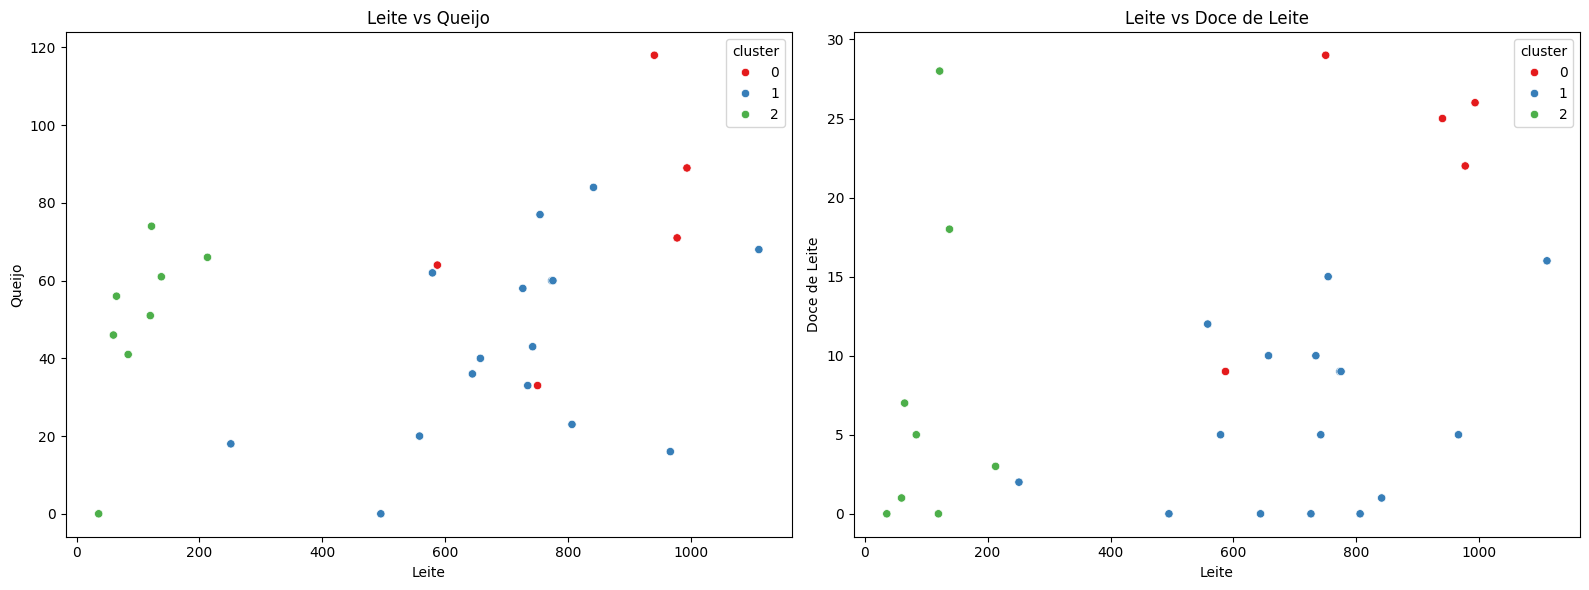

In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[colunas])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.scatterplot(data=df, x= 'leite', y='queijo', hue='cluster', palette='Set1', ax=axes[0])
axes[0].set_title('Leite vs Queijo')
axes[0].set_xlabel('Leite')
axes[0].set_ylabel('Queijo')

sns.scatterplot(data=df, x= 'leite', y='doce_leite', hue='cluster', palette='Set1', ax=axes[1])
axes[1].set_title('Leite vs Doce de Leite')
axes[1].set_xlabel('Leite')
axes[1].set_ylabel('Doce de Leite')

plt.tight_layout()
plt.show()

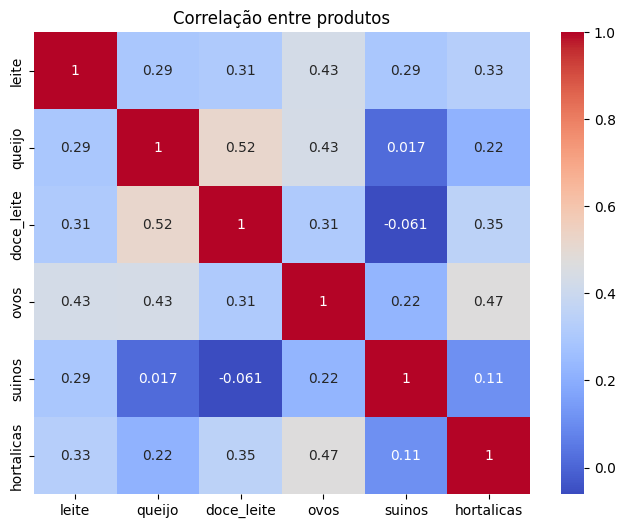

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(df[colunas].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre produtos')
plt.show()

In [70]:
# Média de cada produto por cluster
df.groupby('cluster')[colunas].mean().style.format("{:.2f}")
 

,leite,queijo,doce_leite,ovos,suinos,hortalicas
cluster,,,,,,
0,849.40,75.00,22.20,28.80,6.20,98.80
1,713.19,43.62,6.19,14.94,6.12,27.00
2,104.75,49.38,7.75,4.75,2.12,1.12


<Axes: xlabel='data', ylabel='quantidade'>

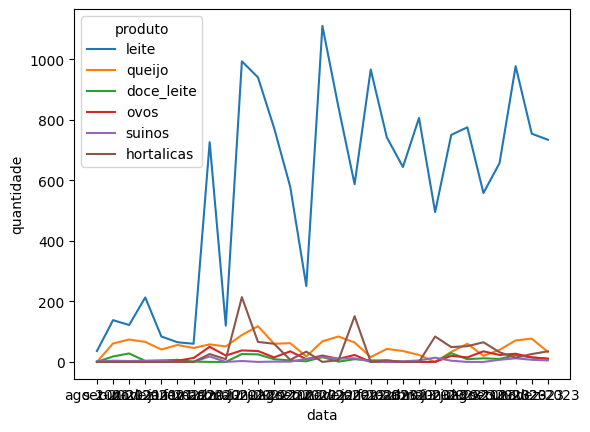

In [71]:
df_melted = df.melt(id_vars='data', value_vars=colunas, var_name='produto', value_name='quantidade')
sns.lineplot(data=df_melted, x='data', y='quantidade', hue='produto')


In [85]:
X = df.drop(columns=['queijo', 'data'])
y = df['queijo'] 
split_index = int(len(df) * 0.8)

training_X = X.iloc[:split_index]
test_X = X.iloc[split_index:]

training_y = y.iloc[:split_index]
test_y = y.iloc[split_index:]


In [82]:
# X = df.drop(columns=['queijo', 'data'])
# y = df['queijo'] 
# training_X, test_X, training_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
model = auto_arima(y=training_y,
                   X=training_X,
                   m=12)

n_periods = len(test_y)
forecast = model.predict(n_periods=n_periods, X=test_X)

forecast

/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/d

23    60.236267
24    79.126296
25    61.685672
26    67.359891
27    61.962794
28    52.994840
dtype: float64

<Axes: >

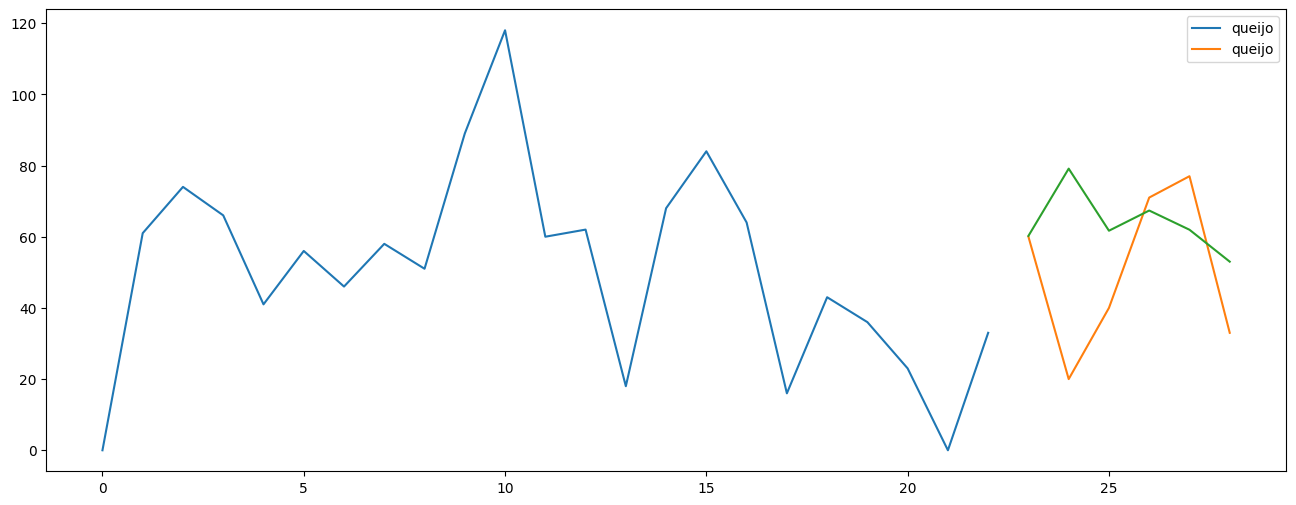

In [93]:
training_y.plot(figsize=(16, 6), legend=True)
test_y.plot(legend=True)
forecast.plot()